In [1]:
import darts

In [2]:
from darts.datasets import AirPassengersDataset

In [3]:
import matplotlib.pyplot as plt

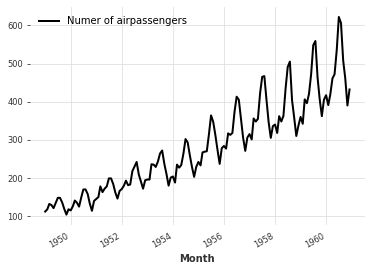

In [12]:
import matplotlib.pyplot as plt
series_air =AirPassengersDataset().load()
series_air.plot(label='Numer of airpassengers')
plt.legend();

In [9]:
AirPassengersDataset().load().pd_dataframe()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [13]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

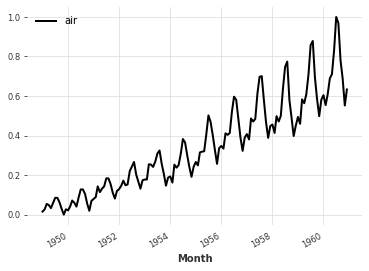

In [16]:
from darts.dataprocessing.transformers import Scaler
scaler_air = Scaler()
series_air_scaled=scaler_air.fit_transform(series_air)

series_air_scaled.plot(label='air')
plt.legend()

In [17]:
# Train and Validation Split
train_air, val_air =series_air_scaled[:-36], series_air_scaled[-36:]

In [20]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [21]:
model_air=NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [22]:
model_air.fit(train_air, verbose=True)

C:\Users\suma.s.huddar\Anaconda3\lib\site-packages\darts\timeseries.py:4079: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
2022-09-26 14:51:54 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-09-26 14:51:54 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-09-26 14:51:54 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-09-26 14:51:54 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-09-26 14:51:54 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3

Training: 0it [00:00, ?it/s]

2022-09-26 14:52:51 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


Predicting: 3it [00:00, ?it/s]

MAPE=9.75%


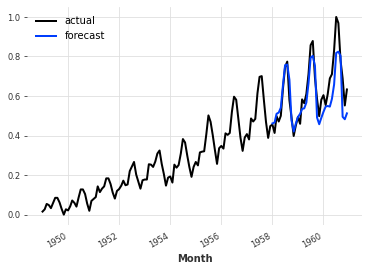

In [23]:
pred= model_air.predict(n=36, series=train_air)
series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE={:.2f}%'.format(mape(series_air_scaled,pred)))